# Project 2: Investigate a Dataset (TMDb Movies Data)
###### The goal of the project is making the exploratory data analysis using numpy, pandas, seaborn and matplotlib library. The important thing is that we need to note down the questions first, that needs to be answered. The next step would be finding by the answers for the questions by analysing the dataset.

# Questions:
1.Most popular movies yearwise.

2.Top 3 Director with most popular movies.

3.Top 10 movies of All Time based on popularity.

4.Most profitable movies, yearwise.

5.Top 10 most profitable movie of All Time.


# Library Importing
###### importing library that used for analysis the data.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data set by using pandas library.
This data set contains informationabout 10,000 movies collected fromThe Movie Database (TMDb).

In [59]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


by using head function we are not get all column name so we use info() function to investigate about the column name,missing value,duplicates etc.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [61]:
for i,v in enumerate(df.columns):
    print(i,v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


# cleaning data
###### Removing unwanted column i.e not use for analysis.

In [62]:
df.drop(['homepage', 'tagline', 'keywords','overview','release_date','runtime','imdb_id','budget_adj','revenue_adj'], axis=1,inplace=True)

In [63]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


##### checking the null value,duplicates and spelling mistakes etc.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1018.8+ KB


here we see that few colums(cast,director,genres,production_companies) has missing value.so first we have to fix these problems.

In [65]:
df.fillna("unknown",inplace=True) #by this code the we can fix the problem of missing values.

###### 2nd problem is checking duplicates.

In [66]:
df.duplicated().sum()

1

number of duplicates is 1. Now we have to fix duplicate problem.

In [67]:
df.drop_duplicates(inplace=True)

#### Remove outlier in this case there are some movies that has 0 budget and revenue 

In [68]:
df[['budget','revenue']] = df[['budget','revenue']].replace(0,np.NAN)
df.dropna(subset=['budget', 'revenue'], inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3854 non-null object
director                3854 non-null object
genres                  3854 non-null object
production_companies    3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 391.4+ KB


we use statistics to know about the data behaviours.

In [70]:
df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,527.720291,6.168163,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,879.956821,0.794920,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,10.000000,2.200000,1960.000000
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,71.000000,5.700000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,204.000000,6.200000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,580.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.400000,2015.000000


In [71]:
df['profit'] = df['revenue']-df['budget']
df['profit'] = df['profit'].apply(np.int64)

Text(0.5,0,'Profit in Dollar(1e9)')

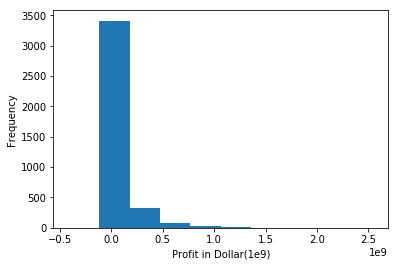

In [80]:
df['profit'].plot(kind='hist')
plt.xlabel("Profit in Dollar(1e9)")

Text(0.5,0,'popularity')

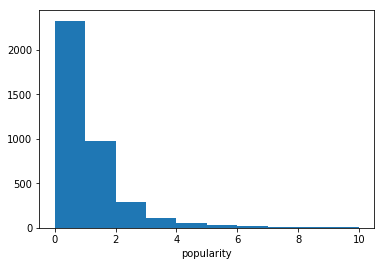

In [81]:
plt.hist(df.popularity,bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel("popularity")

Note: The plot is right skewed. And most of the movies have popularity in range(0-2)

# Most popular movie (yearwise)

In [93]:
li=df.groupby("release_year")["popularity"].max()
temp=pd.merge(df,li)
temp.sort_values(by=['release_year'], inplace=True)
temp[["release_year","original_title","popularity"]].reset_index(drop=True)

,release_year,original_title,popularity
0,1960,Psycho,2.610362
1,1961,One Hundred and One Dalmatians,2.631987
2,1962,Dr. No,3.170651
3,1963,From Russia With Love,2.508235
4,1964,Goldfinger,3.153791
5,1965,Thunderball,1.910465
6,1966,Who's Afraid of Virginia Woolf?,0.670274
7,1967,The Jungle Book,2.550704
8,1968,2001: A Space Odyssey,3.309196
9,1969,On Her Majesty's Secret Service,1.778746


In [94]:
df.popularity.describe()

count    3854.000000
mean        1.191554
std         1.475162
min         0.001117
25%         0.462368
50%         0.797511
75%         1.368324
max        32.985763
Name: popularity, dtype: float64

##### Movies with popularity > 1.368324 (which is 3rd Quartile Value) is considered among most popular movies. 

In [96]:
popular=df[df['popularity']>1.368324]

In [97]:
popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 10756
Data columns (total 13 columns):
id                      964 non-null int64
popularity              964 non-null float64
budget                  964 non-null float64
revenue                 964 non-null float64
original_title          964 non-null object
cast                    964 non-null object
director                964 non-null object
genres                  964 non-null object
production_companies    964 non-null object
vote_count              964 non-null int64
vote_average            964 non-null float64
release_year            964 non-null int64
profit                  964 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 105.4+ KB


# Top 3 Director with most popular movies

In [98]:
popular.director.value_counts()

Steven Spielberg    18
Tim Burton          13
Ridley Scott        13
David Fincher       10
Martin Scorsese      9
                    ..
Mark Rosman          1
Terrence Malick      1
James Wong           1
Robert Stevenson     1
Scott Speer          1
Name: director, Length: 524, dtype: int64

Top three directors are Steven Spielberg,Tim Burton and Ridley Scott

# Top 10 movies of All Time based on popularity.

In [102]:
top=df[(df.popularity >1.368324) & (df.vote_average>7)].sort_values(by=['popularity'],ascending=False).reset_index(drop=True)


In [103]:
top10=(top[["original_title","release_year","popularity"]])[:10]
top10

,original_title,release_year,popularity
0,Mad Max: Fury Road,2015,28.419936
1,Interstellar,2014,24.949134
2,Guardians of the Galaxy,2014,14.311205
3,Captain America: The Winter Soldier,2014,12.971027
4,Star Wars,1977,12.037933
5,Star Wars: The Force Awakens,2015,11.173104
6,The Hobbit: The Battle of the Five Armies,2014,10.174599
7,Avatar,2009,9.432768
8,Inception,2010,9.363643
9,Furious 7,2015,9.335014


Text(0.5,0,'popularity')

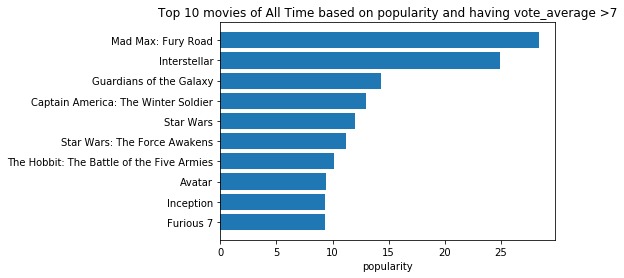

In [107]:
temp10=top10.sort_values(by=['popularity'],ascending=True)
plt.barh(temp10.original_title,temp10.popularity)
plt.title("Top 10 movies of All Time based on popularity and having vote_average >7")
plt.xlabel("popularity")

In [111]:
pro=df.groupby("release_year")['profit'].max()
temp2=pd.merge(df,pro)
temp2.sort_values(by=['release_year'],inplace=True)
temp2[['release_year','original_title','profit']].reset_index(drop=True)

,release_year,original_title,profit
0,1960,Spartacus,48000000
1,1961,One Hundred and One Dalmatians,211880014
2,1962,Dr. No,58500000
3,1963,From Russia With Love,76398765
4,1964,Goldfinger,121400000
5,1965,The Sound of Music,155014286
6,1966,Who's Afraid of Virginia Woolf?,26236689
7,1967,The Jungle Book,201843612
8,1968,2001: A Space Odyssey,44715371
9,1969,Butch Cassidy and the Sundance Kid,96308889


In [116]:
prof=df.sort_values(by=['profit'],ascending = False).reset_index(drop= True)[:10]
prof[['release_year','original_title','profit']]

,release_year,original_title,profit
0,2009,Avatar,2544505847
1,2015,Star Wars: The Force Awakens,1868178225
2,1997,Titanic,1645034188
3,2015,Jurassic World,1363528810
4,2015,Furious 7,1316249360
5,2012,The Avengers,1299557910
6,2011,Harry Potter and the Deathly Hallows: Part 2,1202817822
7,2015,Avengers: Age of Ultron,1125035767
8,2013,Frozen,1124219009
9,1995,The Net,1084279658


Text(0.5,0,'profit In Dollar(1e9)')

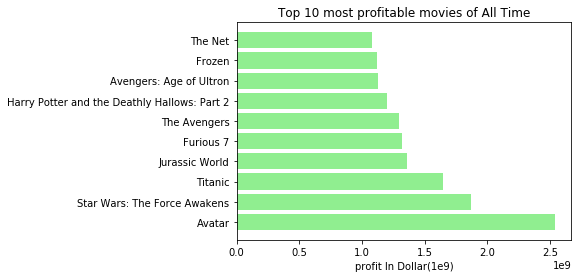

In [118]:
plt.barh(prof.original_title,prof.profit,color="lightgreen")
plt.title("Top 10 most profitable movies of All Time")
plt.xlabel("profit In Dollar(1e9)")

Note: Avatar made highest exceptional profit.

In [119]:
df[["popularity","profit","vote_average","budget","revenue"]].corr()

,popularity,profit,vote_average,budget,revenue
popularity,1.000000,0.596201,0.317866,0.446987,0.615535
profit,0.596201,1.000000,0.259435,0.526818,0.979133
vote_average,0.317866,0.259435,1.000000,0.024169,0.227123
budget,0.446987,0.526818,0.024169,1.000000,0.688556
revenue,0.615535,0.979133,0.227123,0.688556,1.000000


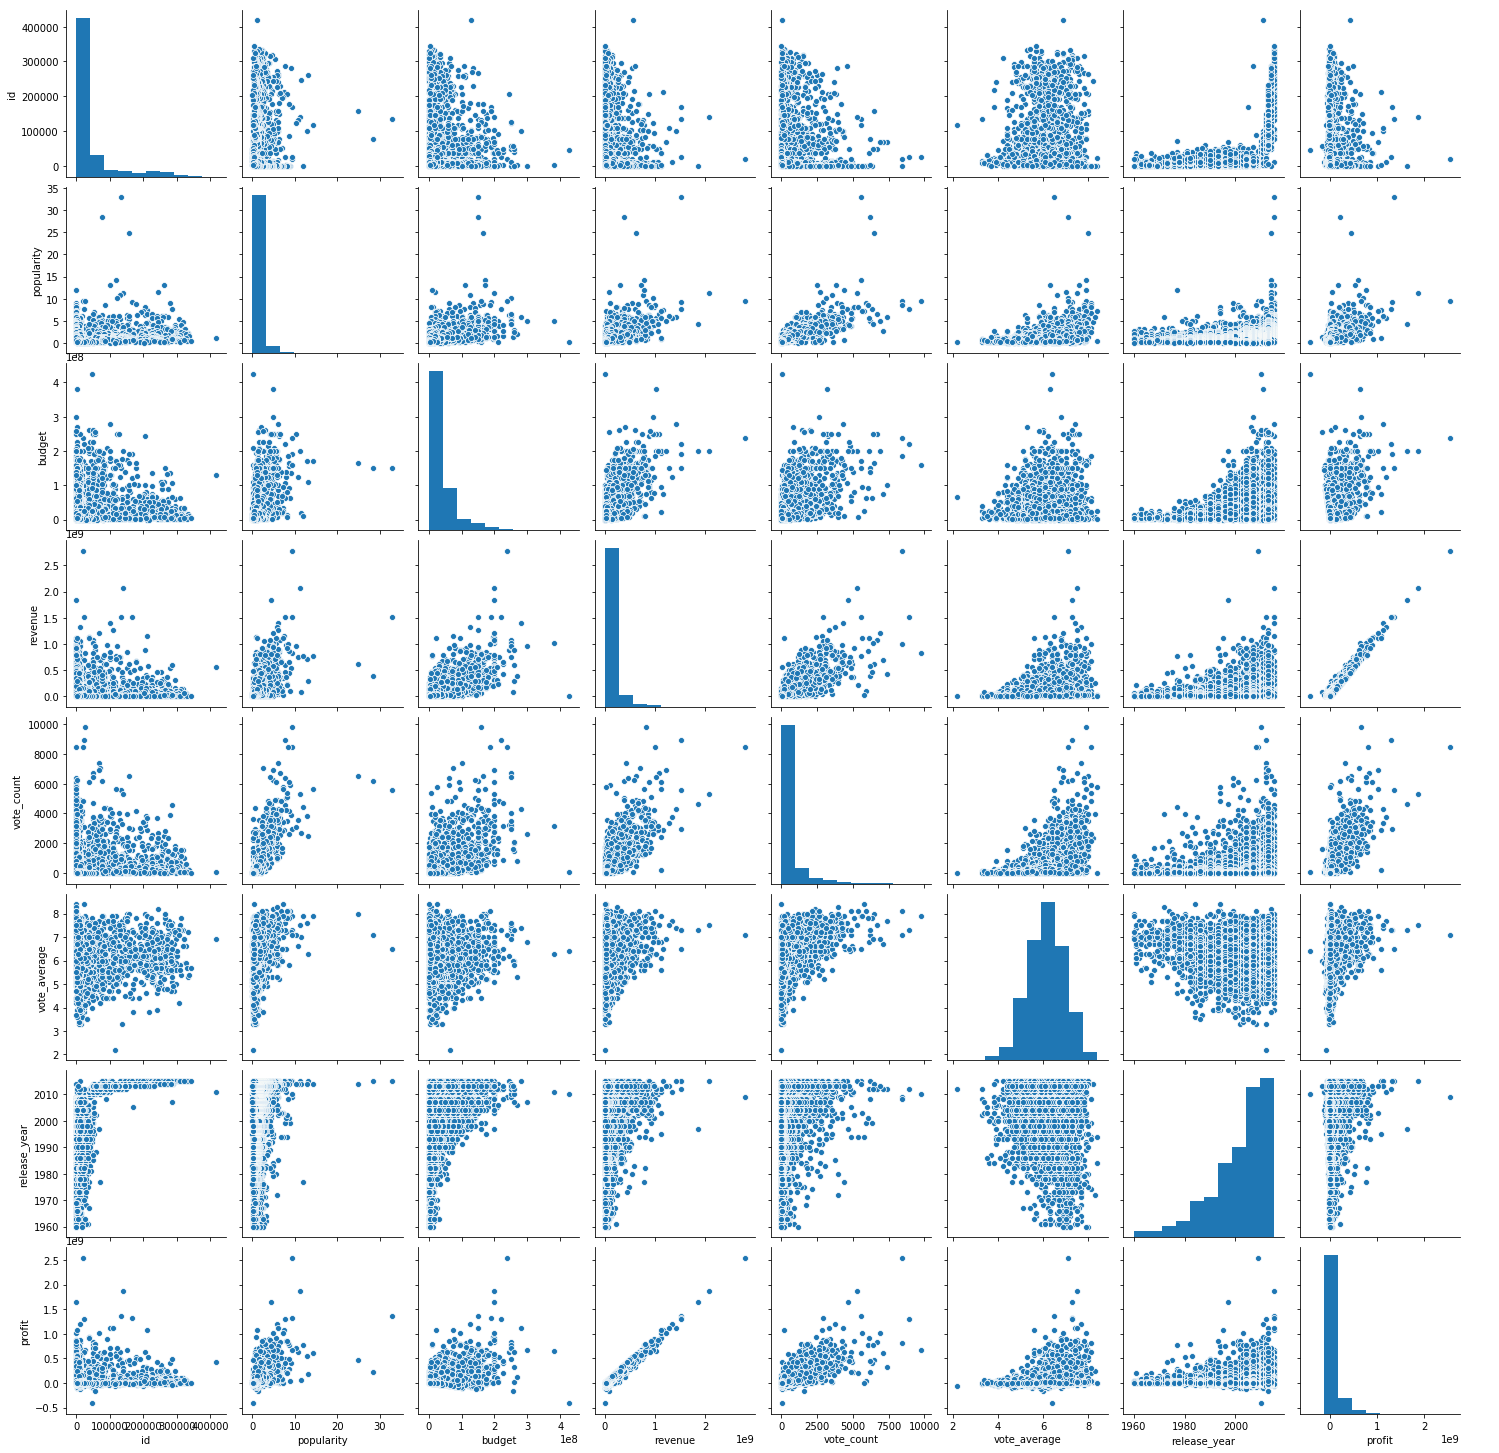

In [120]:
sns.pairplot(df)

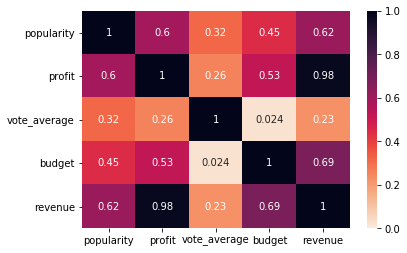

In [122]:
sns.heatmap(df[["popularity","profit","vote_average","budget","revenue"]].corr(),cmap='rocket_r',annot=True,vmin=0)

# Moderate correlation between popularity and revenue & profit
# Strong correlation betwwen revenue and profit
# Moderate correlation between budget and profit
### Conclusions
1. Based on correlation
Moderate correlation between popularity and revenue & profit: Generally movies with high popularity generate more revenue and profit.
2.Strong correlation betwwen revenue and profit: Movies that generate more revenue, makes more profit
3.Moderate correlation between budget and profit: Movies which high budget are more likely to make more profit

2. Based on observation

1. Steven Spielberg , Ridley Scott , Ridley Scott are top 3 Director with most popular movies of all time.
2. Mad Max: Fury Road is the most popular movie of all time based on popularity and average vote.
3. Avatar is the most profitable movie of all time

### Limitation
1. The movies data is from year 1960 to 2015, and all the conclusion is based according to it, thus missing recent movies.
2. There were movies with 0 revenue and budget, those movie names are removed. Therefore there popularity is not considered.